# QA2-DoNounsBecomeAbstract

In [1]:
from koselleck import *

In [2]:
dfabs=get_dfpiv_abs().reset_index().melt(id_vars=['word'],value_name='abs')
dfabs['period2']=dfabs['period'].apply(lambda x: prdz(x, ystart=1700,ystep=10))
# dfabs['period2']=dfabs['period'].apply(lambda x: prdz(x, ystep=20))
dfabs=dfabs.groupby(['word','period2']).mean().reset_index().dropna()
dfabs

,word,period2,abs
8,abandonment,1780,1.327681
9,abandonment,1790,1.171656
10,abandonment,1800,2.413275
11,abandonment,1810,2.713879
12,abandonment,1820,2.842349
...,...,...,...
120015,zoology,1850,0.007163
120016,zoology,1860,0.178568
120017,zoology,1870,-0.018641
120018,zoology,1880,0.091106


In [3]:
pavg=dfabs[dfabs.word.isin(get_words_ever_abs())].groupby('period2').median().reset_index()
pavg['word']='(Singular nouns)'
pavg

,period2,abs,word
0,1700,1.030939,(Singular nouns)
1,1710,1.000036,(Singular nouns)
2,1720,1.142579,(Singular nouns)
3,1730,1.347240,(Singular nouns)
4,1740,1.368206,(Singular nouns)
5,1750,1.406359,(Singular nouns)
6,1760,1.408272,(Singular nouns)
7,1770,1.493862,(Singular nouns)
8,1780,1.564871,(Singular nouns)
9,1790,1.583538,(Singular nouns)


In [4]:
wdfabs=dfabs.groupby('word').mean().sort_values('abs')
wdfabs

,period2,abs
word,,
wood,1795.0,-2.380178
bamboo,1830.0,-2.281229
pond,1795.0,-2.278668
top,1795.0,-2.269159
hoop,1810.0,-2.247108
...,...,...
religion,1795.0,2.621102
prejudice,1795.0,2.649408
sincerity,1795.0,2.713058


In [5]:
# most conc
# wdfabs.head(25)

In [6]:
wdfabs.tail(25)

,period2,abs
word,,
adherence,1800.000000,2.507115
acquiescence,1820.000000,2.511550
forbearance,1798.947368,2.512969
toleration,1795.000000,2.515906
patriotism,1810.000000,2.519277
neglect,1795.000000,2.521629
enlightenment,1855.000000,2.531120
mankind,1795.000000,2.532336
submission,1795.000000,2.533629


In [7]:
# most changing
dfc=get_classed_changes().sort_values('mean_diff_t_abs',ascending=False)
dfc=dfc[~dfc.mean_diff_t_abs.isnull()]
dfc=dfc[dfc.vector=='Abs-Conc.Median']
dfc.head(10)

,word,vector,change,mean1,mean2,mean_diff,mean_diff_t,mean_diff_p,mean_diff_t_abs,len1,...,neighborhood1_local,neighborhood2_local,score_diff_t_abstractness,score_diff_p_abstractness,class_abs,class_change,class_signif,class,mean_diff_abs,change_rank
113,reaction,Abs-Conc.Median,Abs++,-0.440711,1.762301,2.203012,-100.277296,3.140263e-164,100.277296,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.203012,2
146,admixture,Abs-Conc.Median,Abs+,-0.646893,0.638587,1.285480,-92.940437,2.732954e-159,92.940437,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.285480,1
154,bracelet,Abs-Conc.Median,Conc++,0.194306,-1.619311,-1.813617,92.415689,2.698883e-157,92.415689,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.813617,2
169,precision,Abs-Conc.Median,Abs--,1.764828,0.847461,-0.917366,90.486754,1.029400e-158,90.486754,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.917366,2
185,tact,Abs-Conc.Median,Abs++,-0.534747,1.485453,2.020200,-88.359024,2.498694e-154,88.359024,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020200,2
208,intensity,Abs-Conc.Median,Abs++,-0.053995,1.277670,1.331665,-86.250567,2.019956e-154,86.250567,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331665,2
230,anomaly,Abs-Conc.Median,Abs++,-0.084806,1.784910,1.869716,-83.677013,1.893242e-149,83.677013,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.869716,2
257,transportation,Abs-Conc.Median,Abs++,-0.732615,1.213708,1.946324,-81.093505,8.846044e-148,81.093505,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.946324,2
261,predominance,Abs-Conc.Median,Abs++,0.176976,1.713526,1.536550,-80.755173,2.199332e-144,80.755173,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.536550,2
350,fostering,Abs-Conc.Median,Abs++,0.135724,1.625134,1.489410,-74.963381,3.205882e-142,74.963381,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.489410,2


In [8]:
dfc.change.value_counts()

+          2444
-          1598
Abs+        551
Conc+       217
Abs++       170
Conc--      102
Abs-         60
Conc++       54
Abs--        53
Conc-        23
Conc+++       5
Abs+++        1
Name: change, dtype: int64

In [9]:
dfc[dfc.change=='Abs--']

,word,vector,change,mean1,mean2,mean_diff,mean_diff_t,mean_diff_p,mean_diff_t_abs,len1,...,neighborhood1_local,neighborhood2_local,score_diff_t_abstractness,score_diff_p_abstractness,class_abs,class_change,class_signif,class,mean_diff_abs,change_rank
169,precision,Abs-Conc.Median,Abs--,1.764828,0.847461,-0.917366,90.486754,1.029400e-158,90.486754,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.917366,2
1898,fee,Abs-Conc.Median,Abs--,1.013643,-0.125443,-1.139086,47.811352,4.265790e-106,47.811352,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.139086,2
2239,preservation,Abs-Conc.Median,Abs--,2.128558,0.944704,-1.183854,45.422154,3.618241e-102,45.422154,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.183854,2
2321,occasion,Abs-Conc.Median,Abs--,1.596098,0.955597,-0.640501,44.988921,3.206897e-99,44.988921,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.640501,2
2697,succession,Abs-Conc.Median,Abs--,1.854464,0.754569,-1.099895,43.049670,6.773761e-93,43.049670,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.099895,2
2729,accommodation,Abs-Conc.Median,Abs--,1.497972,0.292098,-1.205874,42.902598,5.859135e-94,42.902598,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.205874,2
3151,safety,Abs-Conc.Median,Abs--,1.940644,0.773127,-1.167517,41.000910,2.308963e-94,41.000910,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.167517,2
3295,filly,Abs-Conc.Median,Abs--,1.118732,-0.698154,-1.816886,40.382077,1.358471e-91,40.382077,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.816886,2
3491,material,Abs-Conc.Median,Abs--,1.810560,0.623262,-1.187299,39.634336,2.139040e-88,39.634336,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.187299,2
3996,majesty,Abs-Conc.Median,Abs--,1.200440,0.569550,-0.630890,37.989682,1.078325e-87,37.989682,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630890,2


In [10]:
@interact
def plot(words='''culture,interest,train,citizen,religion,leather''',smooth=2):
    if type(words)==str:
        words={w.strip().lower() for w in words.split(',') if w.strip()}
    figdf=dfabs[dfabs.word.isin(words)]
    figdf=figdf.append(pavg)
    
    figdf=pd.concat(
        grp.set_index(['word','period2']).sort_index().rolling(smooth,min_periods=1).mean().reset_index()
        for w,grp in figdf.groupby('word')
    )
    
    
    fig=start_fig(
        figdf,
        x='period2',
        y='abs',
        group='word',
        color='word',
        figure_size=(8,5)
    )
    fig+=p9.geom_hline(yintercept=0)
    fig+=p9.geom_line(p9.aes(color='word'),size=1)
    fig+=p9.geom_point(p9.aes(color='word'),size=1)
    fig+=p9.scale_color_brewer(type='qual',palette=3)
    
    fig+=p9.geom_label(p9.aes(label='word'),size=8,data=figdf[figdf.period2==figdf.period2.max()])
    fig.save('figures/fig.few_words_w_singnouns.png')
    return fig

interactive(children=(Text(value='culture,interest,train,citizen,religion,leather', description='words'), IntS…

In [11]:
dfc[dfc.change=='Abs++']

,word,vector,change,mean1,mean2,mean_diff,mean_diff_t,mean_diff_p,mean_diff_t_abs,len1,...,neighborhood1_local,neighborhood2_local,score_diff_t_abstractness,score_diff_p_abstractness,class_abs,class_change,class_signif,class,mean_diff_abs,change_rank
113,reaction,Abs-Conc.Median,Abs++,-0.440711,1.762301,2.203012,-100.277296,3.140263e-164,100.277296,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.203012,2
185,tact,Abs-Conc.Median,Abs++,-0.534747,1.485453,2.020200,-88.359024,2.498694e-154,88.359024,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020200,2
208,intensity,Abs-Conc.Median,Abs++,-0.053995,1.277670,1.331665,-86.250567,2.019956e-154,86.250567,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331665,2
230,anomaly,Abs-Conc.Median,Abs++,-0.084806,1.784910,1.869716,-83.677013,1.893242e-149,83.677013,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.869716,2
257,transportation,Abs-Conc.Median,Abs++,-0.732615,1.213708,1.946324,-81.093505,8.846044e-148,81.093505,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.946324,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364,transfer,Abs-Conc.Median,Abs++,0.123537,1.306005,1.182468,-18.754378,1.884221e-36,18.754378,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.182468,2
20674,reformer,Abs-Conc.Median,Abs++,0.486439,2.002554,1.516115,-18.560090,4.450806e-38,18.560090,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.516115,2
20824,fellowship,Abs-Conc.Median,Abs++,0.456719,1.399121,0.942402,-18.493394,1.270522e-41,18.493394,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.942402,2
20975,privacy,Abs-Conc.Median,Abs++,0.405164,1.188779,0.783616,-18.421194,2.452099e-38,18.421194,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.783616,2



## pattern
* Data from Sattelzeit binary model comparison
    * **Noisy** result for semantic change according to the noise aware data
    * **96%** (**~Noisy**) percentile for <u>local semantic change</u> (z=2.2)
* Its neighborhoods:

| Vor der Sattelzeit (1700-1770) | Nach der Sattelzeit (1830-1900) |
| -------------- | -------------- |
| <u>**-example**</u> (10), model (10), <u>**-piety**</u> (10), imitation (10), ornament (10), <u>**-portrait**</u> (10), <u>**-picture**</u> (10), <u>**-purity**</u> (10), <u>**-excellence**</u> (10), <u>**-simplicity**</u> (10), <u>**-painter**</u> (10), <u>**-modesty**</u> (10), <u>**-neatness**</u> (10), <u>**-painting**</u> (10), <u>**-chastity**</u> (9), <u>**-scholar**</u> (9), <u>**-lesson**</u> (9), <u>**-devotion**</u> (9), <u>**-humility**</u> (9), <u>**-virtue**</u> (9), workmanship (9), <u>**-wisdom**</u> (9), <u>**-elegance**</u> (9), <u>**-colouring**</u> (9), <u>**-accomplishment**</u> (8), <u>**-architect**</u> (8), <u>**-temperance**</u> (8), <u>**-image**</u> (8), <u>**-architecture**</u> (8), <u>**-artist**</u> (8), <u>**-sobriety**</u> (8), <u>**-institution**</u> (7), <u>**-endowment**</u> (7), <u>**-sanctity**</u> (7), <u>**-lustre**</u> (7), <u>**-sublimity**</u> (7), <u>**-taste**</u> (7), <u>**-symmetry**</u> (7), statuary (7), <u>**-sculpture**</u> (7), <u>**-munificence**</u> (6), <u>**-decorum**</u> (6), <u>**-mirror**</u> (6), <u>**-beneficence**</u> (6), <u>**-beauty**</u> (6), <u>**-talent**</u> (6), <u>**-deportment**</u> (6), <u>**-instruction**</u> (5), <u>**-emulation**</u> (4), <u>**-morality**</u> (4), <u>**-attire**</u> (4), <u>**-pencil**</u> (4), <u>**-veneration**</u> (4), <u>**-character**</u> (4), <u>**-founder**</u> (3), <u>**-adoration**</u> (3), <u>**-genius**</u> (3), <u>**-likeness**</u> (3), <u>**-imagery**</u> (3), <u>**-garb**</u> (3), type (3), <u>**-creator**</u> (3), <u>**-precept**</u> (2), <u>**-profession**</u> (2), <u>**-redeemer**</u> (2), <u>**-sample**</u> (2), <u>**-attainment**</u> (2), <u>**-ingenuity**</u> (2), <u>**-sweetness**</u> (2), <u>**-style**</u> (2), <u>**-composition**</u> (2), <u>**-legislator**</u> (2), <u>**-probity**</u> (2), <u>**-matron**</u> (2), <u>**-heroism**</u> (2), <u>**-philosopher**</u> (2) | <u>**+embroidery**</u> (10), <u>**+silk**</u> (10), <u>**+damask**</u> (10), <u>**+enamel**</u> (10), <u>**+ribbon**</u> (10), <u>**+velvet**</u> (10), <u>**+brocade**</u> (10), <u>**+crape**</u> (10), ornament (10), <u>**+lace**</u> (10), <u>**+leather**</u> (10), <u>**+tapestry**</u> (10), <u>**+linen**</u> (10), <u>**+scarf**</u> (10), model (10), <u>**+texture**</u> (10), <u>**+frill**</u> (10), <u>**+ivory**</u> (10), <u>**+design**</u> (10), <u>**+fig**</u> (10), <u>**+paste**</u> (10), <u>**+vase**</u> (10), drapery (10), <u>**+frock**</u> (9), <u>**+toilette**</u> (9), <u>**+petticoat**</u> (9), workmanship (9), <u>**+garment**</u> (9), <u>**+decoration**</u> (9), <u>**+varnish**</u> (9), <u>**+stocking**</u> (9), <u>**+flannel**</u> (8), type (8), <u>**+roller**</u> (8), <u>**+seam**</u> (8), <u>**+fringe**</u> (8), <u>**+cornice**</u> (8), <u>**+carving**</u> (8), <u>**+collar**</u> (7), <u>**+carpet**</u> (7), <u>**+button**</u> (7), <u>**+comb**</u> (7), <u>**+buff**</u> (6), <u>**+porcelain**</u> (6), <u>**+wool**</u> (6), <u>**+metal**</u> (6), <u>**+thread**</u> (6), <u>**+loop**</u> (5), <u>**+pendant**</u> (5), <u>**+brass**</u> (5), <u>**+hoop**</u> (5), <u>**+plate**</u> (4), <u>**+jacket**</u> (4), <u>**+worsted**</u> (4), <u>**+cushion**</u> (4), <u>**+pin**</u> (4), <u>**+girdle**</u> (3), <u>**+device**</u> (3), <u>**+dress**</u> (2), fashion (2), <u>**+size**</u> (2), <u>**+cord**</u> (2), <u>**+toilet**</u> (2), <u>**+pewter**</u> (2), <u>**+satin**</u> (2), <u>**+cement**</u> (2), imitation (2), <u>**+muslin**</u> (2), <u>**+scroll**</u> (2), <u>**+gown**</u> (2) |

* Its changes along key vectors categorized:
    

change mean_diff  mean1  mean2  mean_diff_t  \
word    vector                                                                
pattern Human-Object.VG      Object+++     -2.55   1.06  -1.49        34.02   
        Active-Passive.HGI   Active+++      +2.3  -1.03   1.27       -35.02   
        Abs-Conc.Median        Conc+++     -2.13   1.06  -1.07        39.82   
        Interp-Desc.HGI       Interp--     -1.11   1.16   0.04        21.19   
        Strong-Weak.HGI       Strong++     +1.06   0.36   1.42       -18.56   
        Collective-Indiv.RH     Indiv+     -1.47   0.86  -0.61        19.53   
        Freq.M                   Freq+      +0.2  -0.27  -0.07       -20.38   
        Time-Space.HGI               -     -1.22  -0.11  -1.33        15.90   
        Woman-Man.VG                 +     +0.72   0.43   1.15        -6.35   
        Pos-Neg.HGI                  -     -0.69   2.42   1.73         5.82   
        Judg-Perc.HGI                -     -0.57   0.17  -0.40         7.51   
        Virtue-Vice.HGI              -     -0.57   2.51   1.93         4.54   
        Pleasure-Pain.HGI            -     -0.24   2.23   1.99         1.67   
        Polit-Acad.HGI               +     +0.21  -0.96  -0.75        -4.34   
        Qual-Quant.HGI               -     -0.14   0.22   0.08         2.80   
        Sing-Plural.M                +     +0.07  -0.30  -0.23        -7.87   
        Ambig.NX                     -     -0.02   0.53   0.51         0.18   

                             mean_diff_p   perc  
word    vector                                   
pattern Human-Object.VG             0.00  93.78  
        Active-Passive.HGI          0.00  94.23  
        Abs-Conc.Median             0.00  96.07  
        Interp-Desc.HGI             0.00  81.28  
        Strong-Weak.HGI             0.00  76.43  
        Collective-Indiv.RH         0.00  78.36  
        Freq.M                      0.00  79.90  
        Time-Space.HGI              0.00  70.19  
        Woman-Man.VG                0.00  33.83  
        Pos-Neg.HGI                 0.00  31.20  
        Judg-Perc.HGI               0.00  39.37  
        Virtue-Vice.HGI             0.00  24.61  
        Pleasure-Pain.HGI           0.22   8.91  
        Polit-Acad.HGI              0.00  23.63  
        Qual-Quant.HGI              0.06  15.26  
        Sing-Plural.M               0.00  41.09  
        Ambig.NX                    0.48   2.07

* These changes visualized:

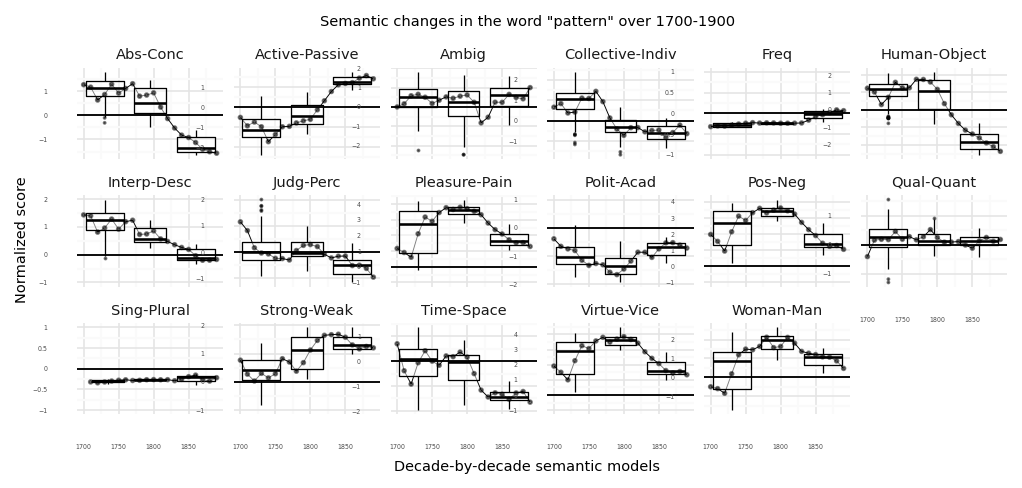

<ggplot: (8746437361505)>

In [12]:
plot_word_info('pattern')

In [13]:
dfc[dfc.change=='Conc+++']

,word,vector,change,mean1,mean2,mean_diff,mean_diff_t,mean_diff_p,mean_diff_t_abs,len1,...,neighborhood1_local,neighborhood2_local,score_diff_t_abstractness,score_diff_p_abstractness,class_abs,class_change,class_signif,class,mean_diff_abs,change_rank
781,muff,Abs-Conc.Median,Conc+++,1.859496,-1.438977,-3.298474,61.163506,2.427243e-126,61.163506,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.298474,3
1979,fettle,Abs-Conc.Median,Conc+++,1.246778,-1.201397,-2.448175,47.269757,6.289820e-103,47.269757,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.448175,3
2623,stile,Abs-Conc.Median,Conc+++,1.070456,-1.652747,-2.723202,43.354829,1.146757e-91,43.354829,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.723202,3
3449,pattern,Abs-Conc.Median,Conc+++,1.063894,-1.068987,-2.132881,39.818603,5.045284e-90,39.818603,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.132881,3
5980,slate,Abs-Conc.Median,Conc+++,1.186055,-1.849539,-3.035595,32.859035,1.286730e-77,32.859035,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.035595,3


In [14]:
dfc[dfc.word=='station']

,word,vector,change,mean1,mean2,mean_diff,mean_diff_t,mean_diff_p,mean_diff_t_abs,len1,...,neighborhood1_local,neighborhood2_local,score_diff_t_abstractness,score_diff_p_abstractness,class_abs,class_change,class_signif,class,mean_diff_abs,change_rank
27887,station,Abs-Conc.Median,-,0.908937,-0.363135,-1.272072,15.166461,1.367039e-26,15.166461,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.272072,0


In [15]:
words=[
    'labourer',
    'reform',
    'catastrophe',
    'demand',
#     'insurrection',
#         'value',
#     'institution',
    'circulation',
    'slave',
    'service',
#         'revolution',
#         'formula',
#         'slavery',
        'example',
#         'citizen',
        'interest',
#         'workmanship',
        'vehicle',
#         'disease',
#     'relationship'
]
len(words)

10

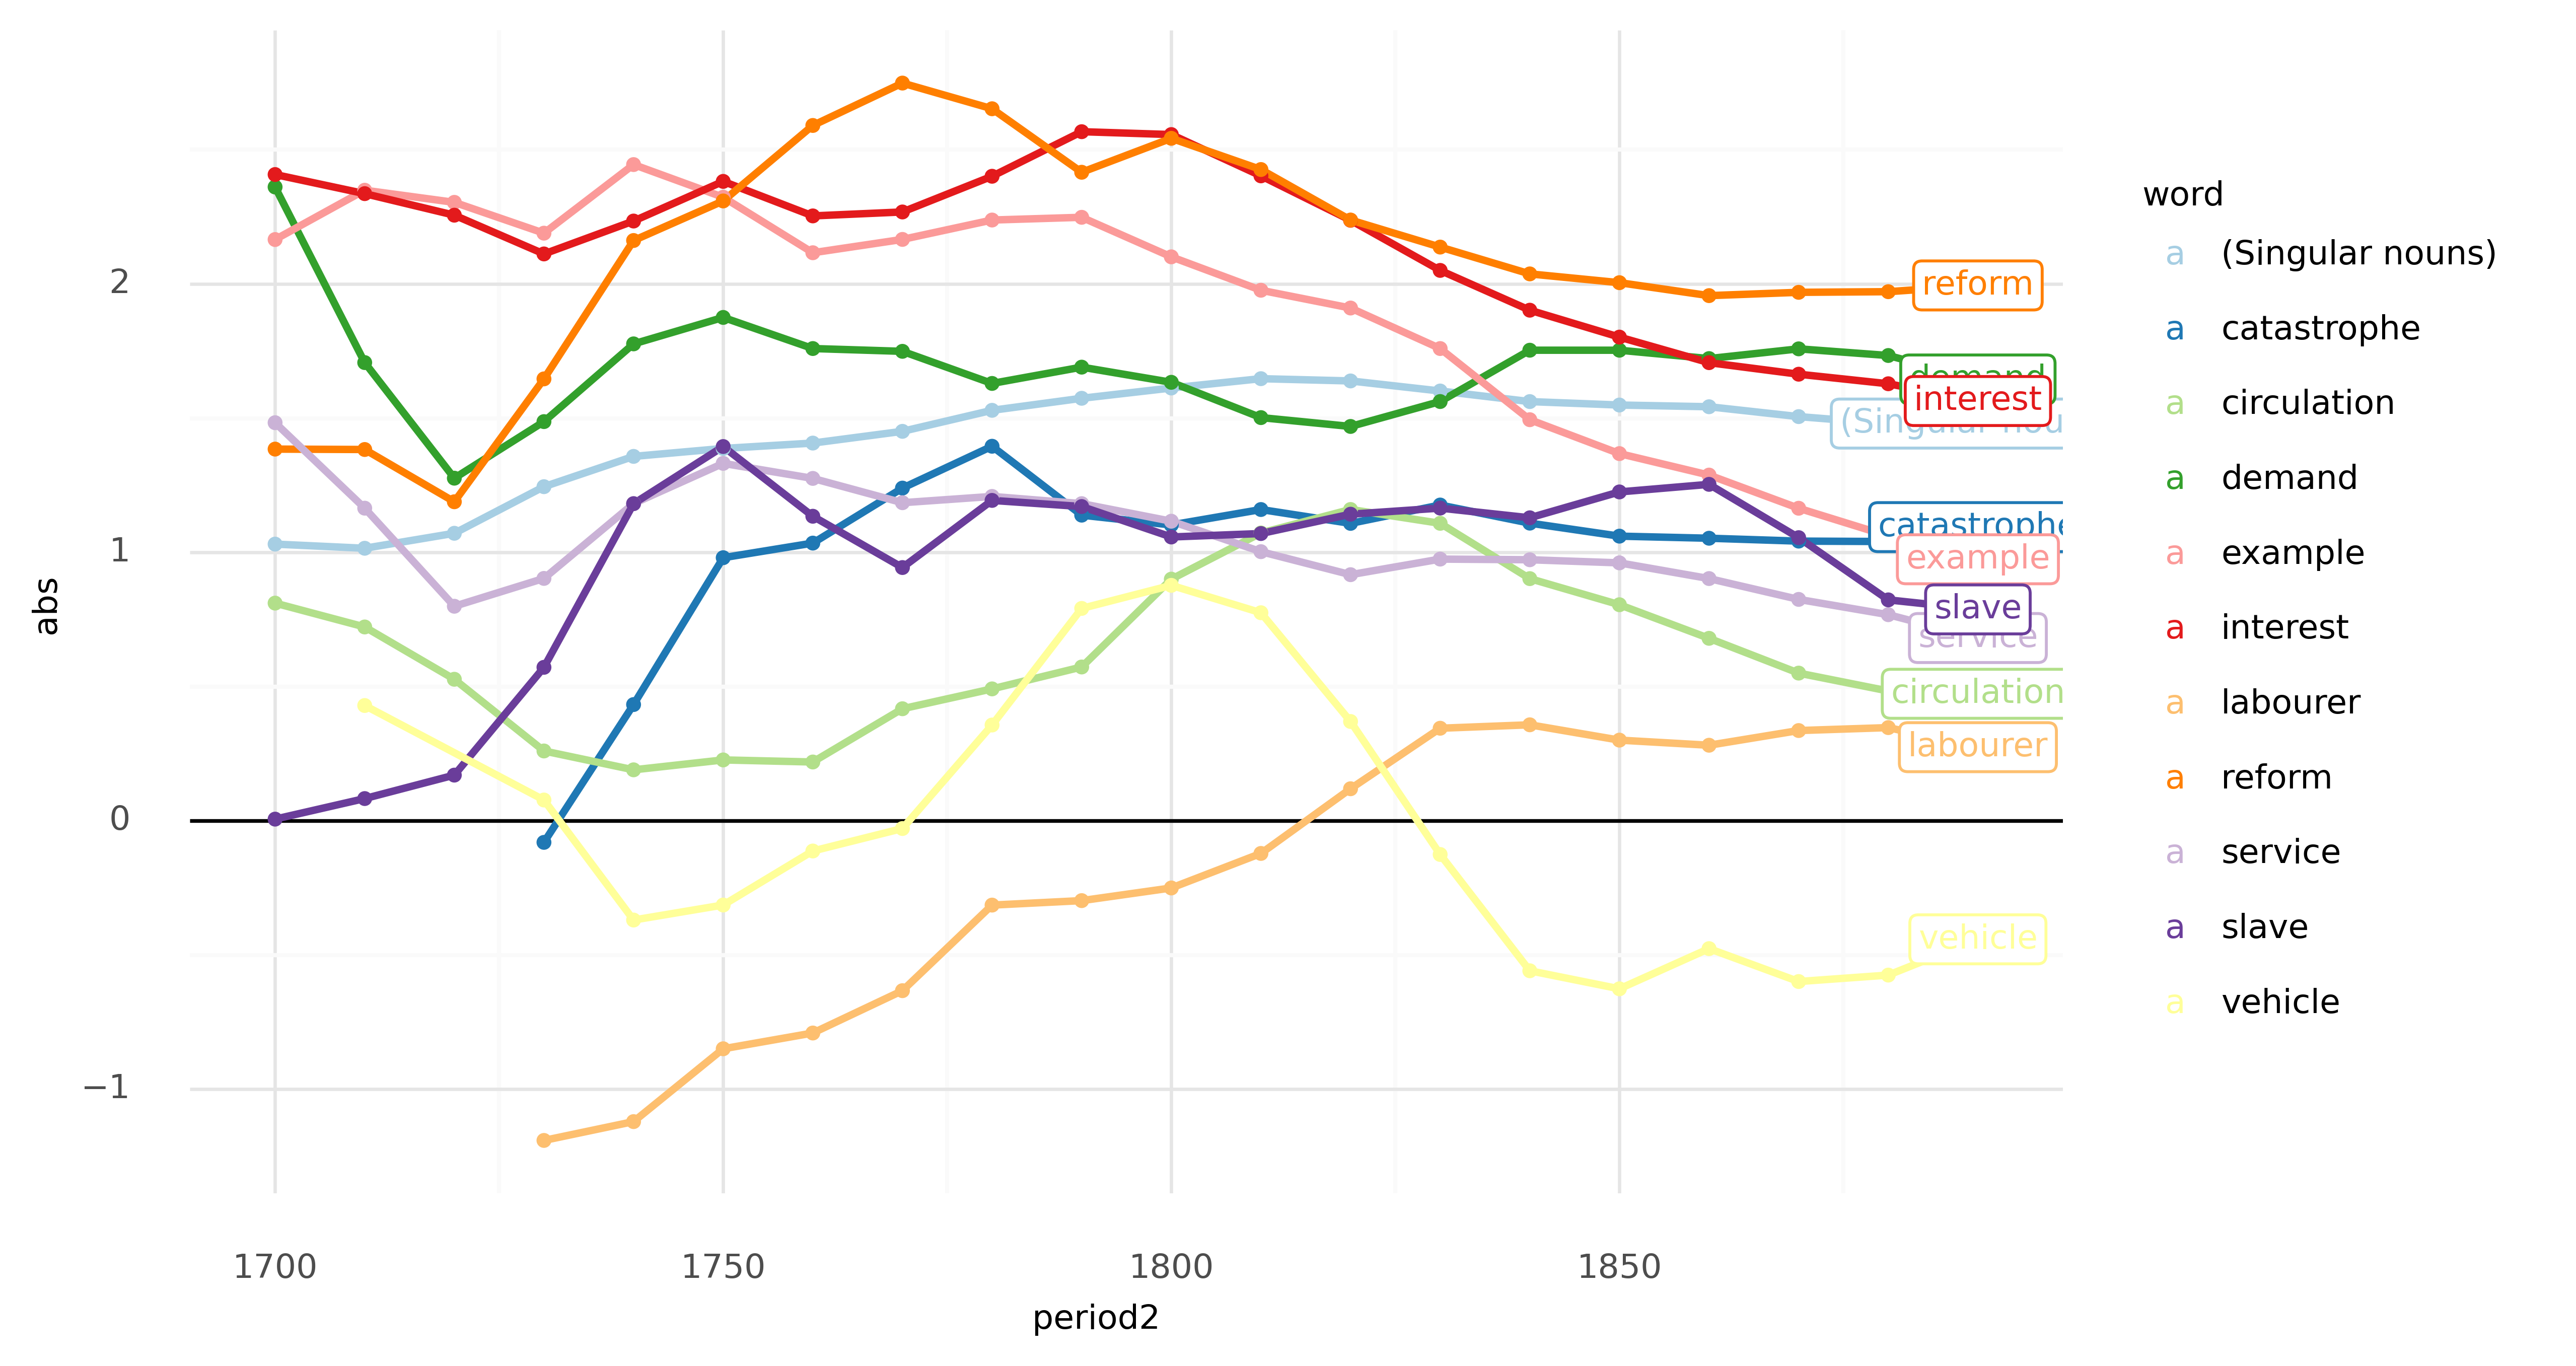

<ggplot: (8746436728957)>

In [17]:
plot(words)
# stop

In [ ]:
plot(dfc[dfc.change=='Abs++'].word.sample(n=5))

In [ ]:
plot(dfc[dfc.change=='Conc++'].word.sample(n=5))

In [ ]:
plot(get_keywords().reset_index().word.sample(n=5))

In [ ]:
dfkw=get_keywords()

In [ ]:
wdfabs2=wdfabs.merge(dfkw,on='word').reset_index().drop_duplicates('word').sort_values('abs').set_index('word')
wdfabs2

In [ ]:
wdfabs2.tail(25)